In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
# Get HTML and parse
html = browser.html
html_soup = soup(html, 'html.parser')

In [7]:
# Get headers using  element and store in list
table_headers = [header.text for header in html_soup.find_all('th')]

print(table_headers)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [8]:
# Get data using  with 'data-row' class and store in list of lists
table_data = []
data_rows = html_soup.find_all('tr', class_='data-row')

for row in data_rows:
    table_data.append(row.text.strip().split())
    
print(table_data[0])
len(table_data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


1867

In [9]:
# Create dataframe
mars_df = pd.DataFrame(table_data, columns=table_headers)

mars_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [10]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [11]:
# Convert the data types
mars_df = mars_df.astype({'id': 'int',
                          'sol': 'int',
                          'ls': 'int',
                          'month': 'int',
                          'min_temp': 'float',
                          'pressure': 'float'})

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [12]:
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [13]:
# Q: How many months exist on Mars?
mars_df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [14]:
# A: there are 12 Months on Mars

In [15]:
# Q: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [16]:
total_sols = mars_df['sol'].count()

print(total_sols)

1867


In [17]:
 # A: 1867

In [18]:
# Q: What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [19]:
# Group by month, aggregrate with mean
temp_by_month = mars_df.groupby('month').mean()['min_temp']

temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

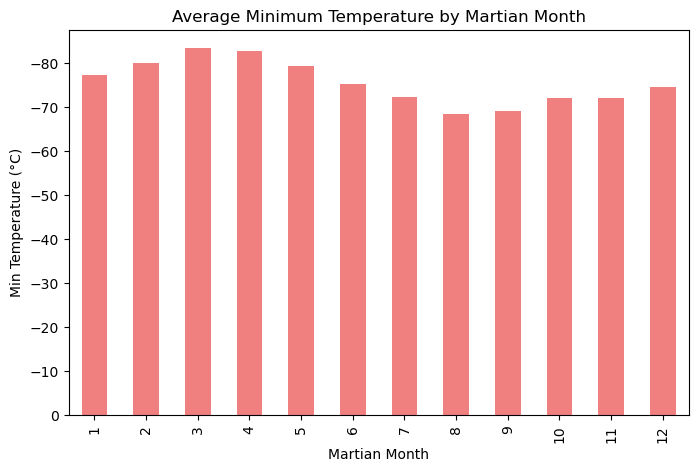

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot data with bar chart
temp_month_plot = temp_by_month.plot(kind='bar', figsize=(8, 5),
                                     color='lightcoral')
temp_month_plot.invert_yaxis()
temp_month_plot.set_xlabel('Martian Month')
temp_month_plot.set_ylabel('Min Temperature (°C)')
temp_month_plot.set_title('Average Minimum Temperature by Martian Month')

plt.show()
plt.savefig('Min_Temp_by_Month.png')

In [ ]:
# A: [Coldest - Month 8] [Warmest - Month 3]

In [22]:
# Which months have the lowest and the highest atmospheric pressure on Mars?

In [23]:
pressure_by_month = mars_df.groupby('month').mean()['pressure']

pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

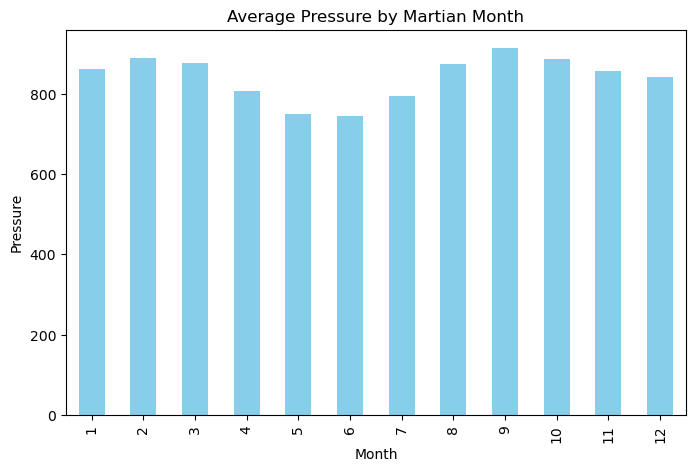

In [26]:
#Plot withj a bar chart
pressure_month_plot = pressure_by_month.plot(kind='bar', figsize=(8, 5),
                                     color='skyblue')
pressure_month_plot.set_xlabel('Month')
pressure_month_plot.set_ylabel('Pressure')
pressure_month_plot.set_title('Average Pressure by Martian Month')

plt.savefig('Pressure_by_Month.png')
plt.show()

In [27]:
# [Highest - Month 9][Lowest - Month 6]

In [28]:
#About how many terrestrial (Earth) days exist in a Martian year?

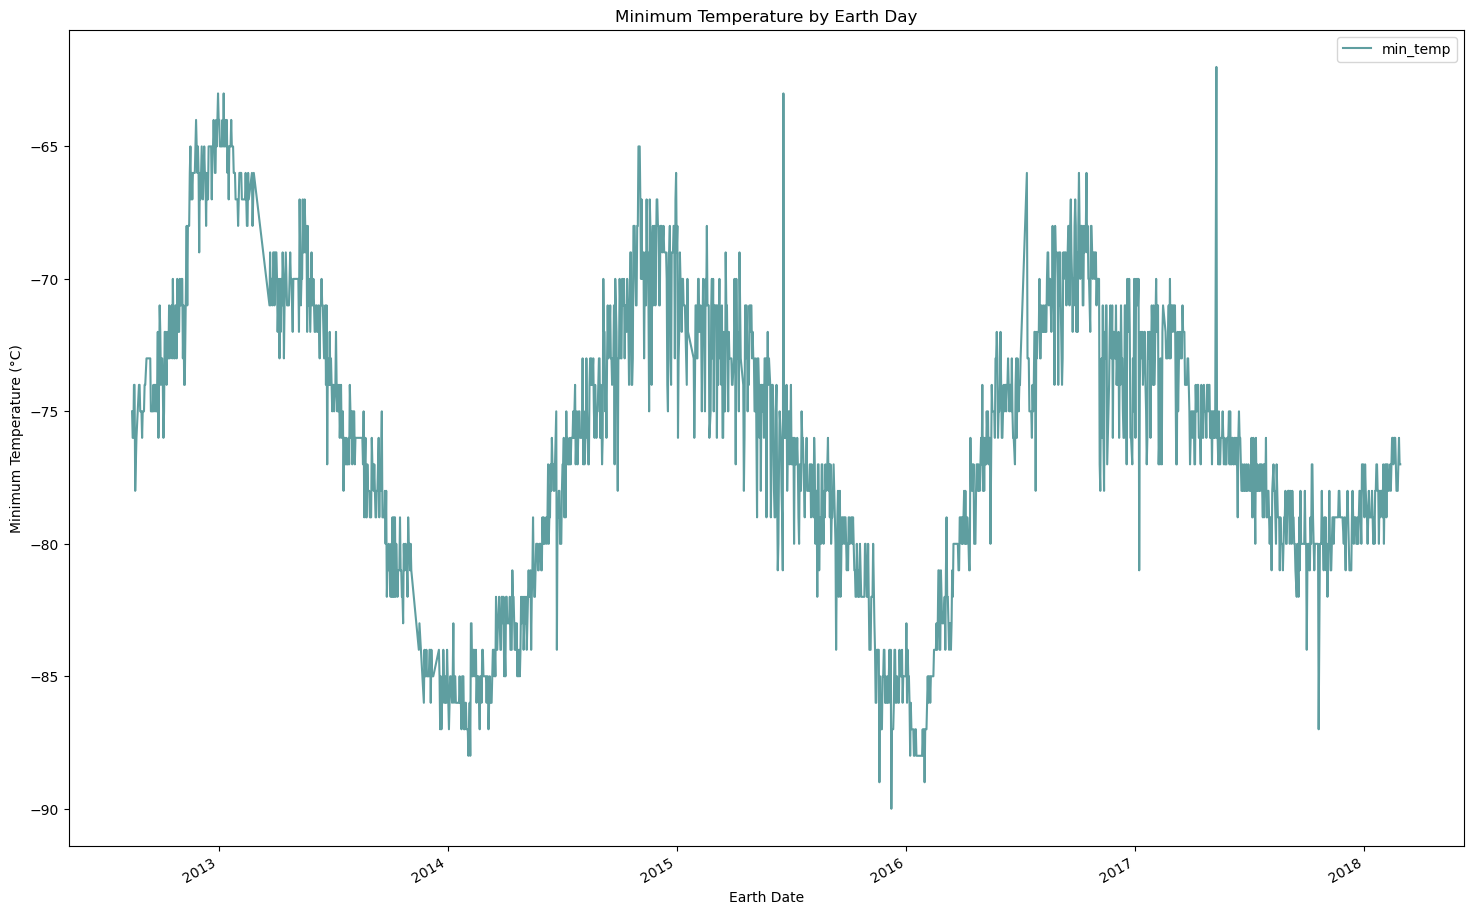

In [30]:
# Plot time series with Terrestrial Date and Min Temperature; can estimate with period of resulting plot
temp_by_earth_date = mars_df.plot(x='terrestrial_date', y='min_temp', figsize=(18, 12),
                                  color='cadetblue')
temp_by_earth_date.set_xlabel('Earth Date')
temp_by_earth_date.set_ylabel('Minimum Temperature (°C)')
temp_by_earth_date.set_title('Minimum Temperature by Earth Day')

plt.savefig('Min_Temp_by_Day.png')
plt.show()

In [33]:
# Get max and min for ls
max_ls = mars_df['ls'].max()
min_ls = mars_df['ls'].min()

print(max_ls)
print(min_ls)

359
0


In [34]:
# use ls to find which terrestrial dates occur at 0
dates_beginning_orbit = mars_df.loc[mars_df['ls'] == 0]

dates_beginning_orbit

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [43]:
d1 = list(mars_df.loc[mars_df['id'] == 320]['terrestrial_date'])[0]
d2 = list(mars_df.loc[mars_df['id'] == 954]['terrestrial_date'])[0]

earth_days_mars_orbit = (d2 - d1).days
earth_days_mars_orbit

687

In [44]:
mars_df.to_csv('mars_data.csv', index=False)